# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedData = pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")
# Display the data table for preview
combinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
print(len(combinedData))

1893


In [24]:
# Checking the number of mice.
#following numerial unique
miceNum = combinedData["Mouse ID"].nunique()
miceNum

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceDups = combinedData[combinedData.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique
miceDups

<bound method Series.unique of 137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object>

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedData.loc[combinedData["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
newIDFrame = combinedData.loc[combinedData["Mouse ID"]=="g989"]
newIDFrame

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDataFrame = combinedData.loc[combinedData["Mouse ID"]!="g989"]
cleanDataFrame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [35]:
# Checking the number of mice in the clean DataFrame.
newMiceNum = cleanDataFrame["Mouse ID"].nunique()
newMiceNum

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugRegimenGroup = cleanDataFrame.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tvMean = drugRegimenGroup["Tumor Volume (mm3)"].mean()
tvMedian = drugRegimenGroup["Tumor Volume (mm3)"].median()
tvVar = drugRegimenGroup["Tumor Volume (mm3)"].var()
tvSD = drugRegimenGroup["Tumor Volume (mm3)"].std()
tvSEM = drugRegimenGroup["Tumor Volume (mm3)"].sem()

tvStats = pd.DataFrame({"Tumor Volume Mean":tvMean,
                        "Tumor Volume Median":tvMedian,
                        "Tumor Volume Variance":tvVar,
                        "Tumor Volume Standard Deviation":tvSD,
                        "Tumor Volume Standard Error of Mean":tvSEM
                        })
tvStats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregateSummary = cleanDataFrame.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# Using the aggregation method, produce the same summary statistics in a single line
aggregateSummary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

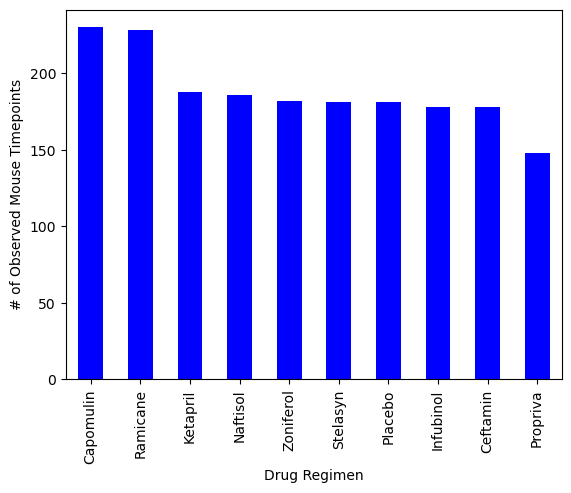

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
miceCount = cleanDataFrame["Drug Regimen"].value_counts()
miceCount
micePlot = miceCount.plot.bar(color="b")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


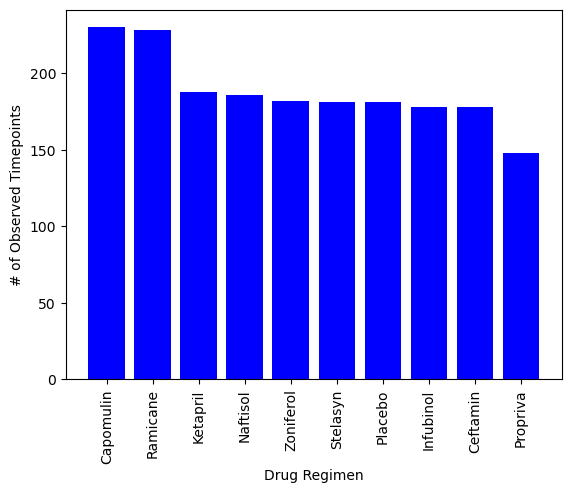

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#we want x and y axis variables then list them for plot
xAxis = miceCount.index.values
yAxis = miceCount.values

#create the bar and add color, "alpha" and where it aligns
plt.bar(xAxis,yAxis, color="b", alpha=1, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation="vertical")

plt.show()

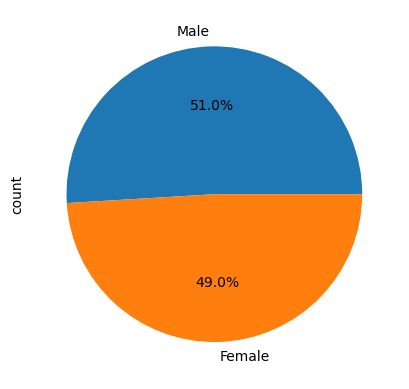

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#so this basically looks at all the numerical times either "Male" or "Female" gets seen then tallied to a total count. The Autopct thing is for formatting the chart with the numbers.
#Honestly ChatGPT has been a real game changer, it really does give great suggestions and code explanations
genderData = cleanDataFrame["Sex"].value_counts()
genderData.plot.pie(autopct="%1.1f%%")
plt.show()

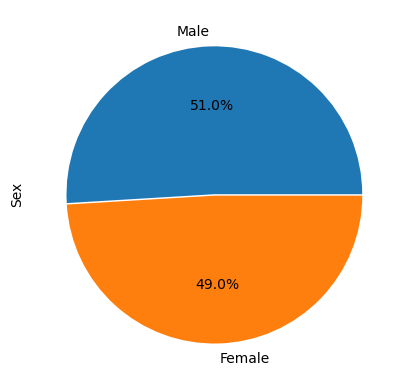

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#like I said before, ChatGPT is really pulling its weight. It's giving me some solid noodle code to work with and figure out the proper variables from there. Saves me so much time and stress from syntax errors
labels = ["Male", "Female"]
sizes = [genderData[0], genderData[1]]
explode = (0,0.01)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#this part i am not certain about but I get that we are referencing the combined Data for Mouse ID then the Timepoints for the max value then resetting the index
lastTimePoint = combinedData.groupby(["Mouse ID"])["Timepoint"].max()
lastTimePoint = lastTimePoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#normally the alignment is started on the center so we have to ask to have it start on the left
mergedDataTimePoint = lastTimePoint.merge(combinedData, on=["Mouse ID", "Timepoint"], how="left")
mergedDataTimePoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [80]:

# Assuming you have a DataFrame called 'data'
# First, filter the data to include only the four treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
totalTumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol = mergedDataTimePoint.loc[mergedDataTimePoint["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    totalTumorVol.append(tumorVol)

    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumorVol.loc[(tumorVol < lower_bound) | (tumorVol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")


For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


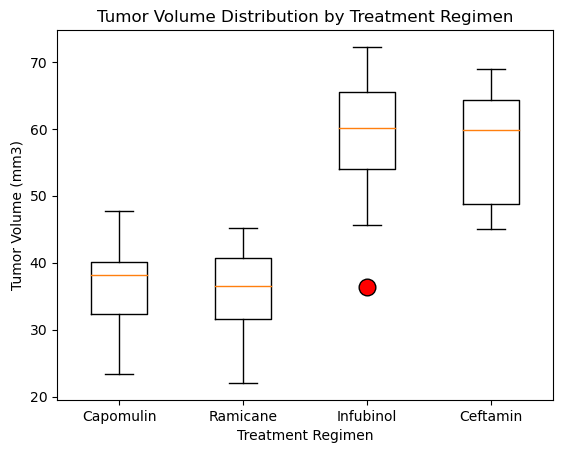

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()

# Create a list of labels for the box plots
labels = treatment_regimens

# Create box plots for each treatment group
#ax.boxplot(totalTumorVol, labels=labels)
boxplot = ax.boxplot(totalTumorVol, labels=labels, flierprops={'markerfacecolor': 'red', 'marker': 'o', 'markersize': 12})

# Set a title and labels for the axes
ax.set_title('Tumor Volume Distribution by Treatment Regimen')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')


# Show the box plots
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

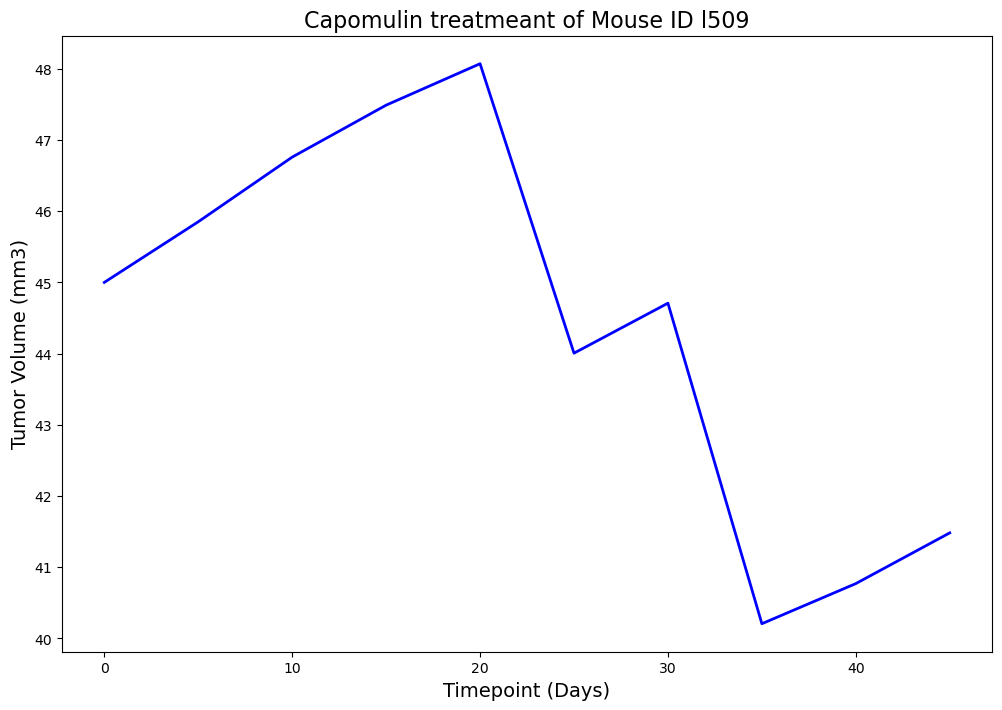

In [117]:
capomulinDF = combinedData.loc[combinedData["Drug Regimen"] == "Capomulin",:]

# Get data for a specific mouse (e.g. Mouse ID = "s185")
miceInCap = capomulinDF.loc[capomulinDF["Mouse ID"] == "l509",:]
miceInCap

# Specify plot parameters
x_axis = miceInCap["Timepoint"]
tumor_volume = miceInCap["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID l509",fontsize =16)
plt.plot(x_axis, tumor_volume,linewidth=2, markersize=12, color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
#underneath I have code that should have turned our the same results but for some reason, refused to plot the line and only charted the one marker. Need to understand why

In [115]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#ChatGPT again making me think why I haven't been using this service before. It's very capable and my eyes are now opened.
# Step 1: Filter data for Capomulin treatment
#capomulin_data = mergedDataTimePoint[mergedDataTimePoint['Drug Regimen'] == 'Capomulin']

# Step 2: Select a single mouse (e.g., 'MouseID') from Capomulin data
#selected_mouse_id = 's185'  # Replace 'YourMouseID' with the actual mouse ID you want to plot
#selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Step 3: Generate the line plot
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
#plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
#plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"],color="blue")

# Set labels and title
#plt.xlabel('Timepoint')
#plt.ylabel('Tumor Volume (mm3)')
#plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin Treatment)')

#plot
#fig2, ax2 =plt.subplot()
#ax2.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"],color="blue")

# Show the plot
#plt.grid()
#plt.show()

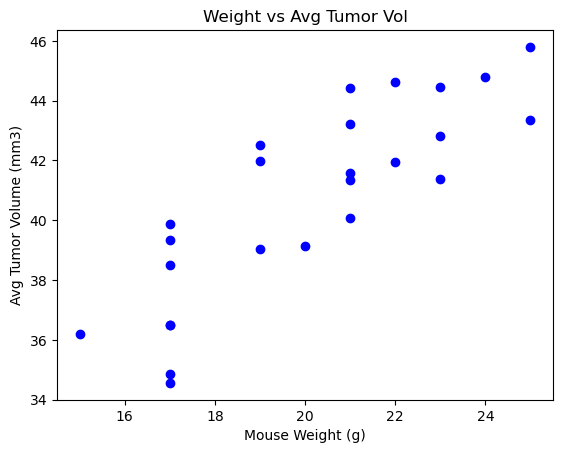

In [136]:
#praise be the ChatGPT, so the new variable is taking a specific row/column of the clean data frame looking for "capomulin" then groups mouse ID with weight and tumor volume to find the mean. Then simply map it all out in scatter plot. Still need to further comprehend the code
capo_regime = cleanDataFrame.loc[cleanDataFrame["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="b")
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


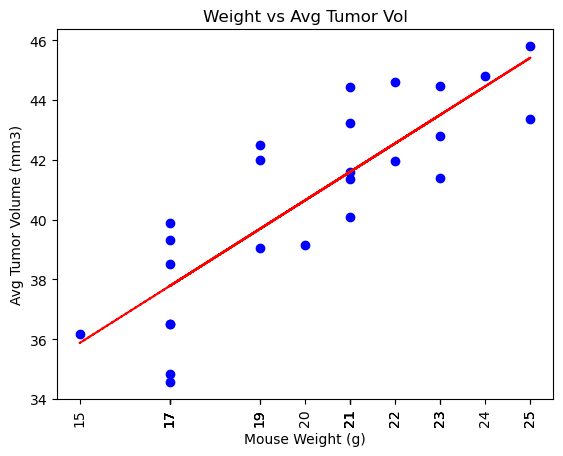

In [144]:
#I couldn't figure this out cleanly so I went online to look at example. This really was rocking my head and I need to consult some office hours to comprehend this further. It's interesting and thankfully ChatGPT helped a bit but I need to comprehend further.
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"])
capo_fit = capo_slope * capo_regime["Weight (g)"] + capo_int
correlation = st.pearsonr(capo_regime['Weight (g)'],capo_regime['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(capo_regime["Weight (g)"],capo_regime["Tumor Volume (mm3)"],color="b")
plt.plot(capo_regime["Weight (g)"],capo_fit,"--",color="r")
plt.xticks(capo_regime["Weight (g)"], rotation=90)
plt.title("Weight vs Avg Tumor Vol")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()